## 0. Load All Data in From CSV Documents

In [36]:
# package imports for clustering
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ImageIOFunctions import LoadImageFromCSV
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

Training data is retrieved and stored from 6 csv documents, where each CSV document contains the data for an image on different channels (RGB) of the satellite image. These are then grouped to produce the x and y raw data.

In [37]:
# image data retrieval from csv
imagedatafnames = ['label1000_1000.csv','label1000_2000.csv','label1000_3000.csv','label1000_4000.csv','label1000_5000.csv','label1000_6000.csv']
imagedatalist = [LoadImageFromCSV(fname) for fname in labeldatafnames]
# stack data vertically to produce raw image data array
image_structured = np.vstack(tuple(labeldatalist))
raw_image = labels_structured.flatten()

In [38]:
# label data retrieval from csv
labeldatafnames = ['label1000_1000.csv','label1000_2000.csv','label1000_3000.csv','label1000_4000.csv','label1000_5000.csv','label1000_6000.csv']
labeldatalist = [LoadImageFromCSV(fname) for fname in labeldatafnames]
# stack data vertically to produce raw label data array
labels_structured = np.vstack(tuple(labeldatalist))
raw_labels = labels_structured.flatten()

Quick sanity check using imshow to make sure that nothing funky happened with training data or label data

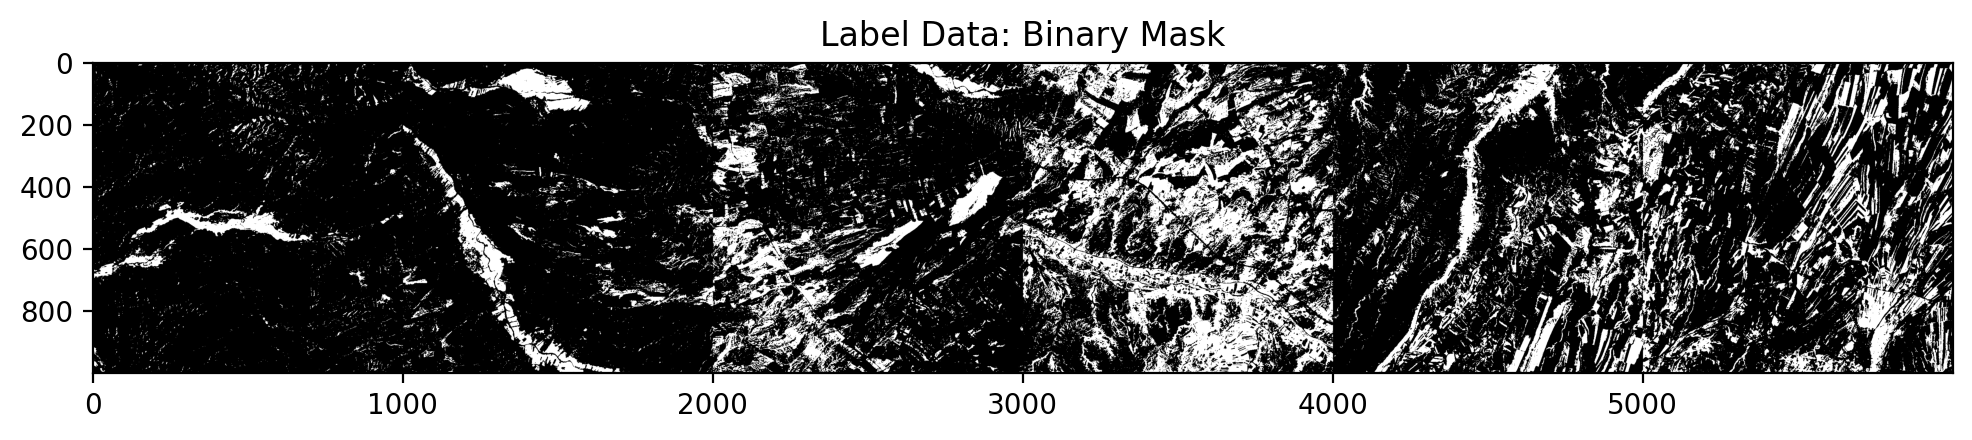

In [44]:
plt.imshow(labels_structured.T, cmap='gray')
plt.title('Label Data: Binary Mask')
plt.show()

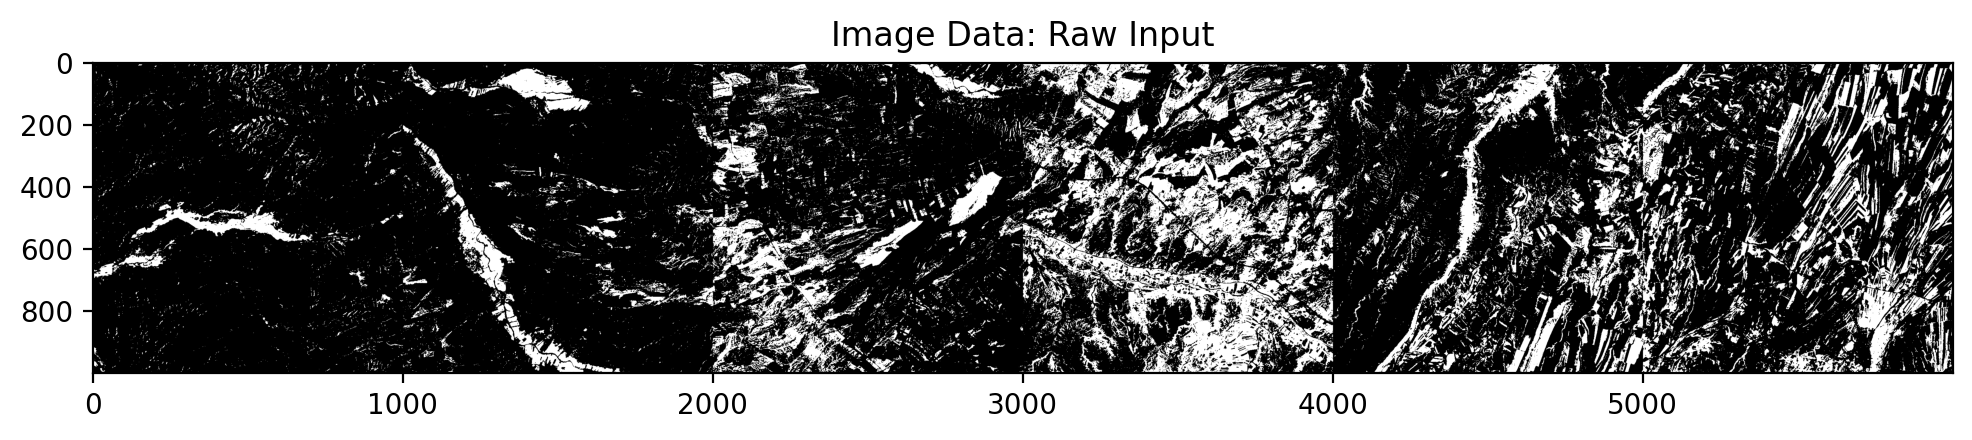

In [42]:
plt.imshow(image_structured.T, cmap='gray')
plt.title('Image Data: Raw Input')
plt.show()

## 1. Implement Clustering Algorithms

In [40]:
# clustering imports
from sklearn.cluster import Birch, MiniBatchKMeans, KMeans

The k-means algorithm will first be implemented, where the characteristics of each pixel in a channel is used to cluster pixels into two clusters (farmland and nonfarmland)

In [41]:
# generate and fit K-means object on image data
km_cluster = KMeans(n_clusters=2, random_state=5).fit(raw_image)
# store predicted cluster values for K-means
km_predicted = km_cluster.predict(raw_image)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

A more robust K-means algorithm will also be used to attempt to cluster image data into two clusters of similar characteristics.

In [ ]:
# generate and fit K-means object on image data
mbkm_cluster = MiniBatchKMeans(n_clusters=2, random_state=5).fit(raw_image)
# store predicted cluster values for K-means
mbkm_predicted = mbkm_cluster.predict(raw_image)

The k-means algorithm will first be implemented, where the characteristics of each pixel in a channel is used to cluster pixels into two clusters (farmland and nonfarmland)

In [ ]:
# generate and fit K-means object on image data
birch_cluster = Birch(n_clusters=2, random_state=5).fit(raw_image)
# store predicted cluster values for K-means
birch_predicted = birch_cluster.predict(raw_image)

## 2. Implement Supervised Algorithms

In [ ]:
# model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

## 3. Assess performance of All Algorithms

In [ ]:
# package imports for clustering and modeling performance
from sklearn.metrics import accuracy_score, f1_score